- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- cross - correlation










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
real_image = io.imread("clown.tif")

real_image_grey = io.imread('clown.tif', as_gray=True)


In [83]:
print "real image shape = ", real_image.shape

real image shape =  (256, 256)


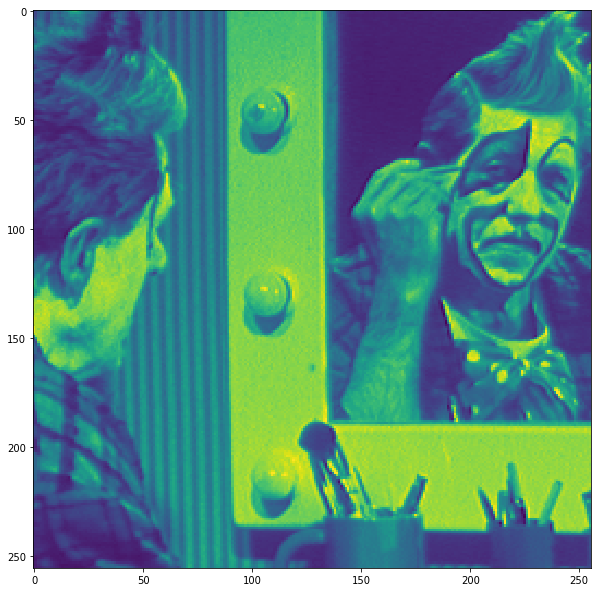

In [84]:
plt.imshow(real_image)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template, padding_mode ):
    
    if(padding_mode == "edge"):
      top = image[0]
      top = np.tile(top, (template.shape[0]/2, 1))
      image = np.vstack((top, image)) # top padding

      bottom = image[-1]
      bottom = np.tile(bottom,(template.shape[0]/2, 1))
      image = np.vstack((image, top)) # Botton padding


      left = image.T[0]
      left = np.tile(left, (template.shape[1]/2, 1))
      image = np.vstack((left, image.T)).T   # left padding

      right = image.T[-1]
      right = np.tile(right, (template.shape[1]/2, 1))
      image = np.vstack((image.T, right)).T  # right padding

    elif(padding_mode == "wrap"):
      top = image[image.shape[0]-(template.shape[0]/2) : , :]
      image = np.vstack((top, image))
      
      bottom = image[:template.shape[0]/2, :]
      image = np.vstack((image, bottom))
      
      left = image[: , image.shape[1] - (template.shape[1]/2): ]
      image = np.vstack((left.T, image.T)).T
      
      right = image[:, :template.shape[1]/2]
      image = np.vstack((image.T, right.T)).T
      
    return image
    
    

In [0]:
def plot(plot_data):
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 20]
  matplotlib.rcParams.update({'font.size': 10})

  # plotting images in a grid
#   y, x = np.unravel_index(np.argmax(corr_output), corr.shape) 
  
  edge_output_v = plot_data["convolve_output_vertical"]
  edge_output_h = plot_data["convolve_output_horizontal"]
  
  edge_real_v = plot_data["convolve_vertical_real"   ]
  edge_real_h = plot_data["convolve_horizontal_real" ]
  
  laplacian_output = plot_data["convolve_output_laplacian"]
  laplacian_real   = plot_data["convolve_laplacian_real"]

  fig, ([[ax_kernel_vertical   , ax_kernel_horizontal  ],
         [ax_orig              , ax_edge               ],
         [ax_vertical          , ax_horizontal         ],
         [ax_vertical_exp      , ax_horizontal_exp     ],
         [ax_laplacian         , ax_laplacian_exp      ]]) = plt.subplots(5, 2)

  # plotting real image
  ax_orig.imshow(plot_data["image"], cmap = 'gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()

  # plotting final edge output
  ax_edge.imshow(abs(edge_output_v) + abs(edge_output_h), cmap = 'gray')
  ax_edge.set_title('final edge output')
  ax_edge.set_axis_off()

  # vertical kernel
  ax_kernel_vertical.imshow((plot_data["kernel_vertical"]), cmap = 'gray')
  ax_kernel_vertical.set_title('vertical edge kernel')
  ax_kernel_vertical.set_axis_off()
  
  #Horizontal kernel
  ax_kernel_horizontal.imshow((plot_data["kernel_horizontal"]), cmap = 'gray')
  ax_kernel_horizontal.set_title('horizontal edge kernel')
  ax_kernel_horizontal.set_axis_off()

  #plotting the vertical edge output
  ax_vertical.imshow(abs(edge_output_v), cmap = 'gray')
  ax_vertical.set_title('convolution vertical edge output')
  ax_vertical.set_axis_off()

  #plotting real vertical edge
  ax_vertical_exp.imshow(abs(edge_real_v), cmap = 'gray')
  ax_vertical_exp.set_title('expected convolution vertical edge')
  ax_vertical_exp.set_axis_off()
  
  #plotting the horizontal edge output
  ax_horizontal.imshow(abs(edge_output_h), cmap = 'gray')
  ax_horizontal.set_title('convolution horizontal edge output')
  ax_horizontal.set_axis_off()

  #plotting real horizontal edge
  ax_horizontal_exp.imshow(abs(edge_real_h), cmap = 'gray')
  ax_horizontal_exp.set_title('expected convolution horizontal edge')
  ax_horizontal_exp.set_axis_off()

  #plotting laplacian filtering of the image output
  ax_laplacian.imshow(abs(laplacian_output), cmap = 'gray')
  ax_laplacian.set_title('laplacian output')
  ax_laplacian.set_axis_off()

  #plotting real laplacian filtering of the image
  ax_laplacian_exp.imshow(abs(laplacian_real), cmap = 'gray')
  ax_laplacian_exp.set_title('laplacian real output')
  ax_laplacian_exp.set_axis_off()

  fig.show()

In [0]:
def convolution(data):
  image    = data["image"]
  template = data["kernel"]
  padding_mode  = data["padding"]
  
  
  padded = pad(image, template, padding_mode)
  corr_output = np.empty(image.shape)

  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          temp_matrix = padded[i:i+template.shape[0] , j:j+template.shape[1]]
          corr_output[i][j] = np.sum(template*temp_matrix)
  
  return corr_output, padded

In [0]:
def invert(template):
 
  inverted = np.empty(template.shape)

  for i in range(template.shape[0]):
    for j in range(template.shape[1]):
      inverted[-i-1, -j-1] = template[i,j]
      
  return inverted

In [0]:
def convolve(data):
  
  image = data["image"]
  kernel_vertical   = data["kernel_vertical"]
  kernel_horizontal = data["kernel_horizontal"]
  kernel_laplacian  = data["kernel_laplacian"]
  template = invert(kernel)


  data_vertical  = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_vertical,
                      "padding"          : "wrap"
                    }
  
  
  data_horizontal = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_horizontal,
                      "padding"          : "wrap"
                    }
  
  
  data_laplacian = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_laplacian,
                      "padding"          : "wrap"
                    }
  
  
  convolve_output_vertical  , padded_vertical      = convolution(data_vertical)

  convolve_output_horizontal, padded_horizontal    = convolution(data_horizontal)
  
  convolve_output_laplacian, padded_laplacian      = convolution(data_laplacian)
  
  convolve_vertical                     = scipy.signal.convolve2d(image,
                                                       kernel_vertical,
                                                       boundary='symm',
                                                       mode='same')
  
  convolve_horizontal                   = scipy.signal.convolve2d(image,
                                                       kernel_horizontal,
                                                       boundary='symm',
                                                       mode='same')
  
  convolve_laplacian                   = scipy.signal.convolve2d(image,
                                                       kernel_laplacian,
                                                       boundary='symm',
                                                       mode='same')
  
  print "convolution done \n"
  
  plot_data = {
               "image"                      : image,  # real image
#                "padded"                     : padded, # padded image
               
               # kernels
               "kernel_vertical"            : kernel_vertical,
               "kernel_horizontal"          : kernel_horizontal,
               
               # Real outputs
               "convolve_vertical_real"     : convolve_vertical,
               "convolve_horizontal_real"   : convolve_horizontal,
                
               # Real laplacian output
               "convolve_laplacian_real"    : convolve_laplacian,
      
      
               # our outputs
               "convolve_output_vertical"   : convolve_output_vertical,
               "convolve_output_horizontal" : convolve_output_horizontal,
  
               # laplacian output
               "convolve_output_laplacian"  : convolve_output_laplacian
              }
  
  
  plot(plot_data)
  
  print "plots done"
  print "____________________________________________________________\n"
  

convolution done 

plots done
____________________________________________________________



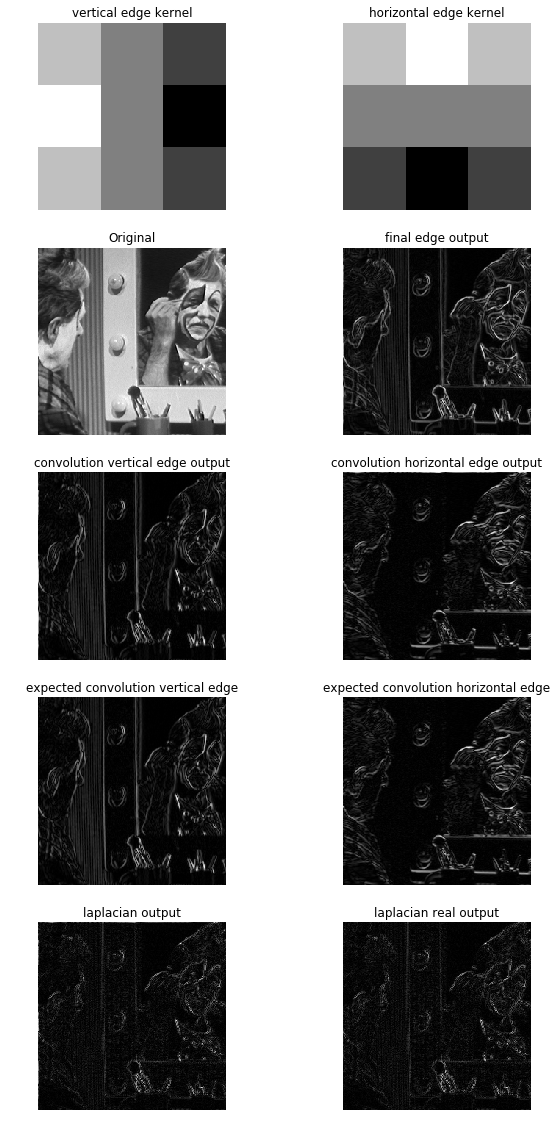

In [90]:
kernel_vertical    = np.array([[1, 0, -1],
                               [2, 0, -2],
                               [1, 0, -1]]) 

kernel_horizontal  = np.array([[ 1,  2,  1],
                               [ 0,  0,  0],
                               [-1, -2, -1]]) 

laplacian = np.array([[ 0, -1,  0],
                      [-1,  4, -1],
                      [ 0, -1,  0]])

data = {
          "image"            : real_image_grey,
          "kernel_vertical"  : kernel_vertical,
          "kernel_horizontal": kernel_horizontal,
          "kernel_laplacian" : laplacian,
          "padding"          : "wrap"
       }

convolve(data)